# Data Cleaning and Exploratory Data Analysis

## Group 1
Anusha Bhat, Devi Mahajan, Mahima Masetty, Nidhi Pareddy

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("hr_data.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(df[col].value_counts())
    print('-----------------------------------')

Attrition
No     1233
Yes     237
Name: count, dtype: int64
-----------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
-----------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
-----------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
-----------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
-----------------------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director            

There are 1,470 rows in our data with 34 predictors, plus one column for our target "attrition" which is binary (1 - yes, 0 - no). There are no null values in our data. Some of the categorical columns are represented as integers (0 or 1) so we need to change this encoding in our data cleaning.

## EDA

In [ ]:
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<ipython-input-36-5131e1e26f3a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-36-5131e1e26f3a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-36-5131e1e26f3a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-36-5131e1e26f3a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-36-5131e1e26f3a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

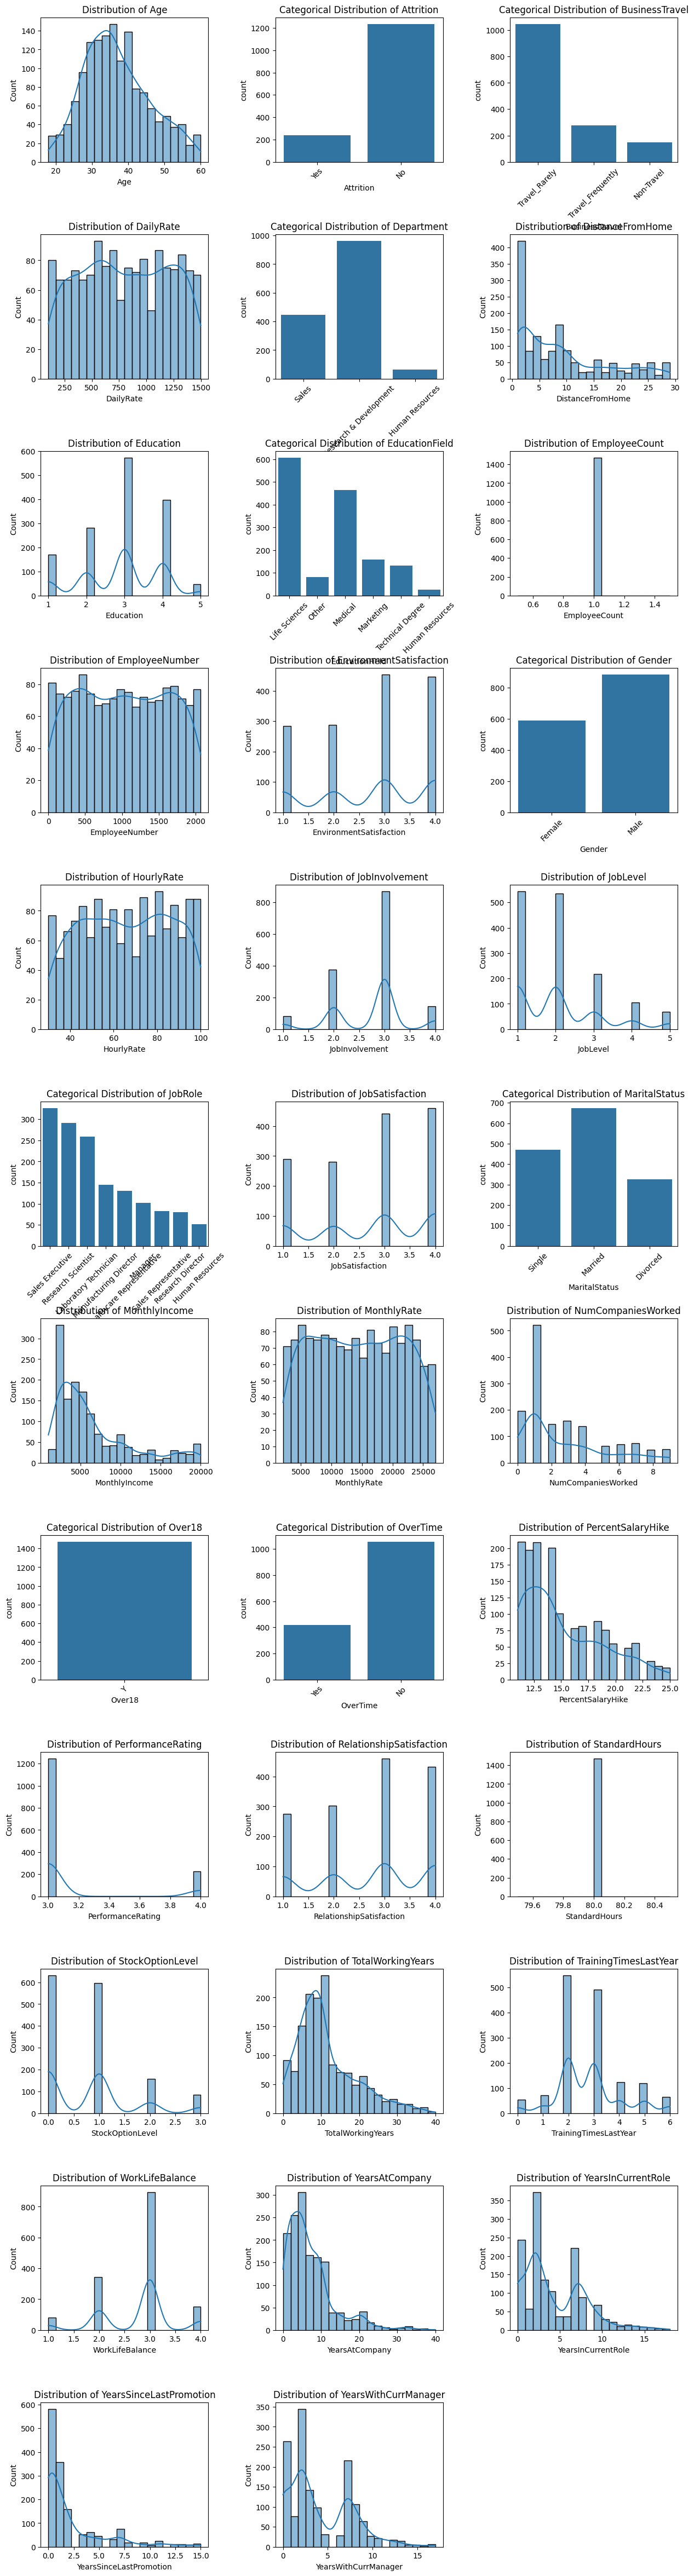

In [ ]:
# Plot distributions with density curve
ncols = 3
nrows = (len(df.columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Loop through all columns and plot their distributions
for i, column in enumerate(df.columns):
    ax = axes[i]

    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        ax.set_title(f'Categorical Distribution of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        sns.histplot(df[column], kde=True, bins=20, ax=ax)
        ax.set_title(f'Distribution of {column}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()

There are some skewed distributions, which we will address using scaling. Standard hours, over18, and eomplyee count only have one value each so we can drop these columns as they will not help with predicting attrition.

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


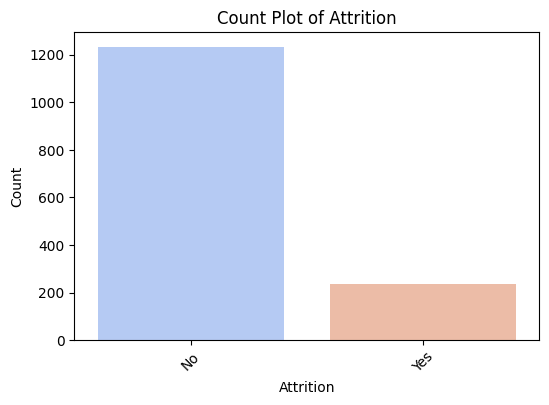

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


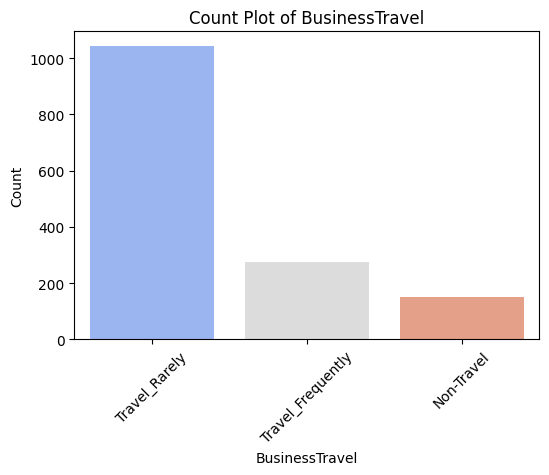

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


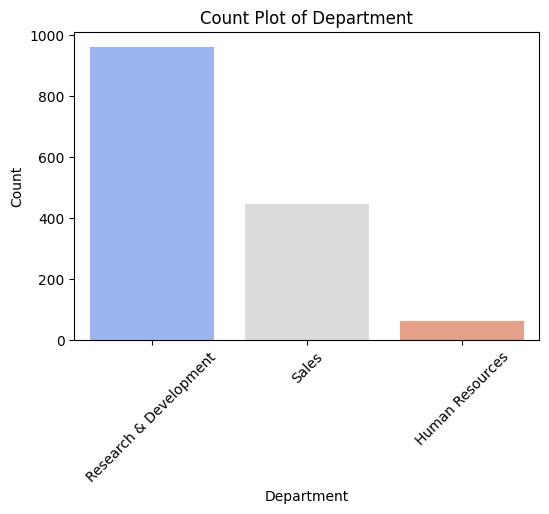

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


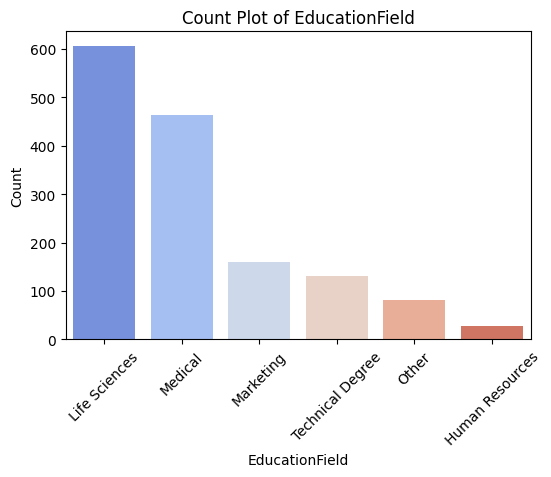

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


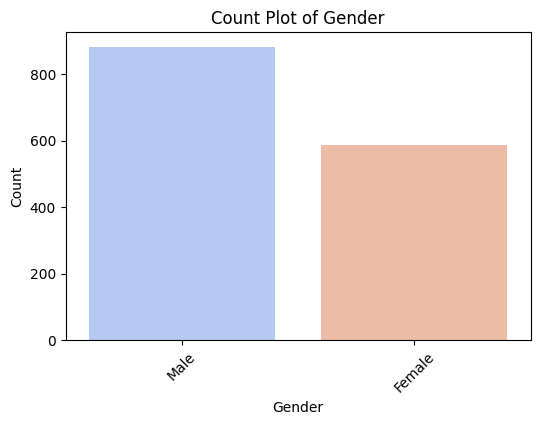

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


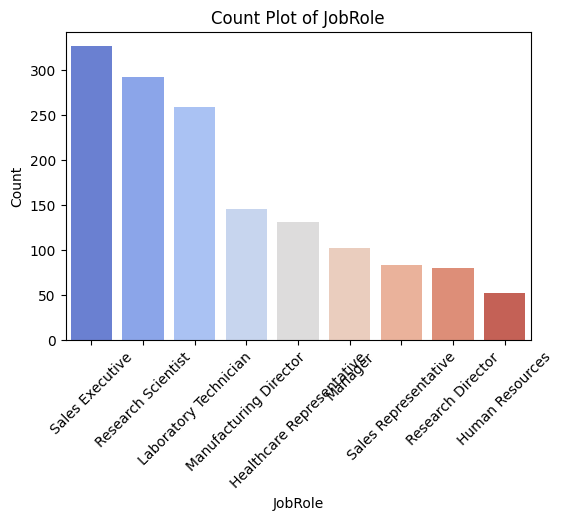

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


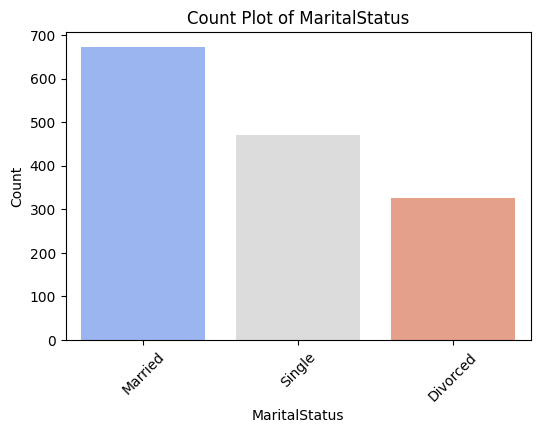

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


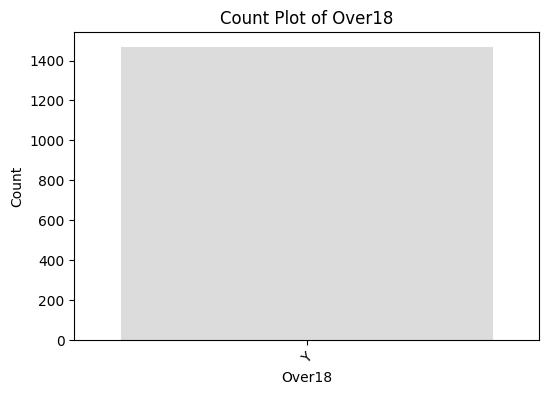

<ipython-input-10-273b0f16d98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")


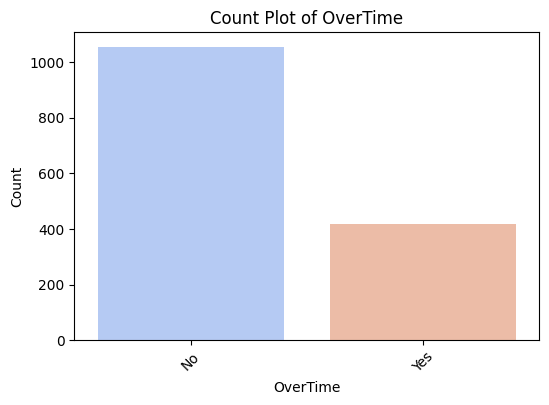

In [ ]:
#catagorical varables plots
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

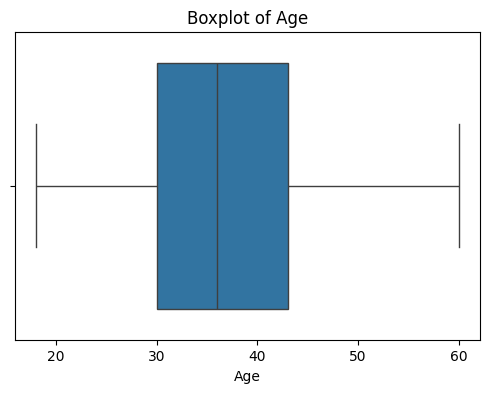

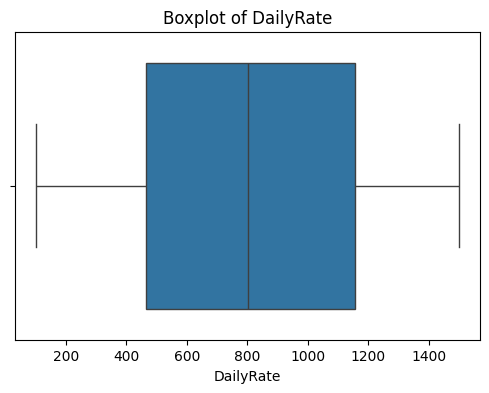

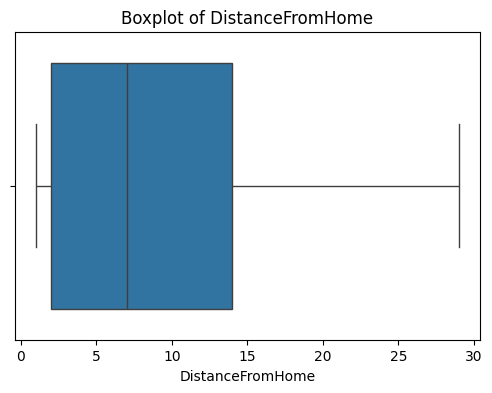

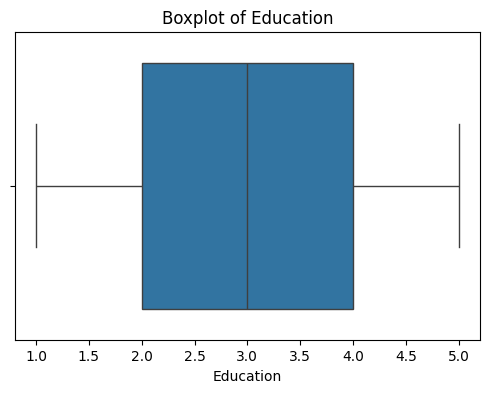

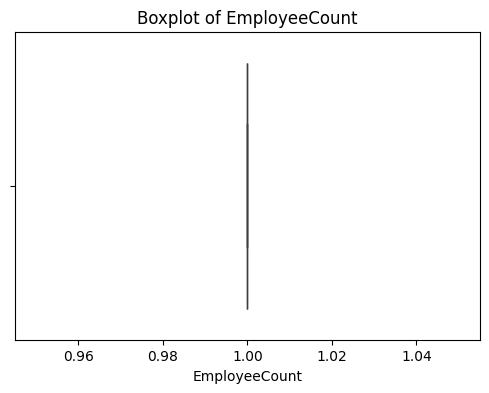

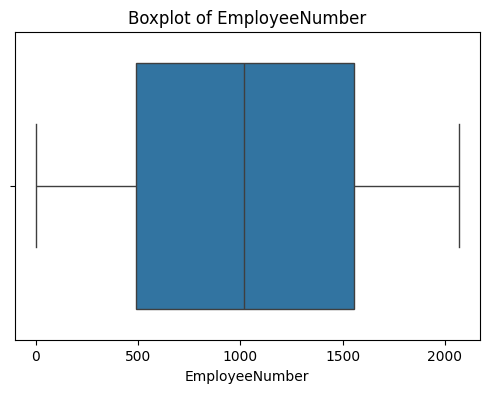

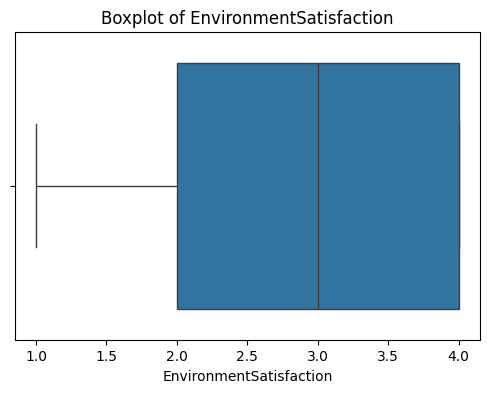

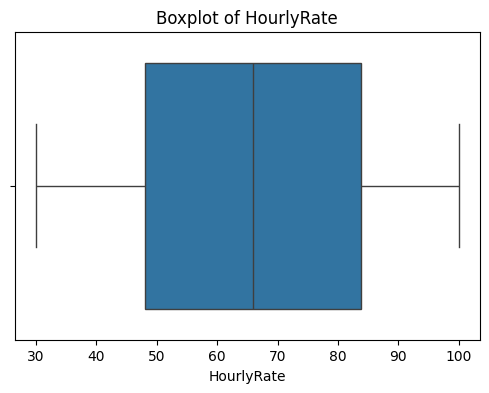

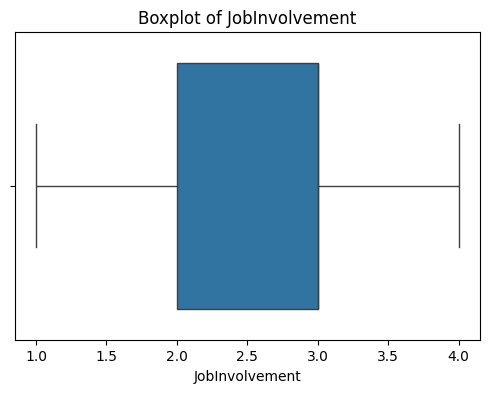

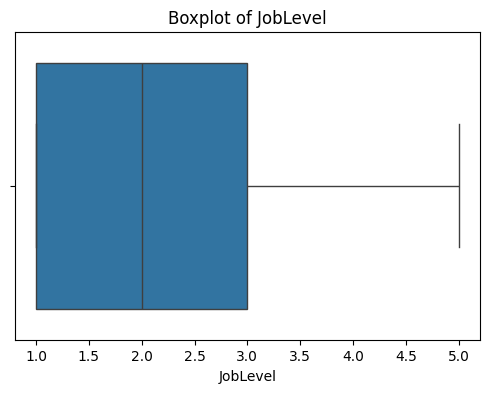

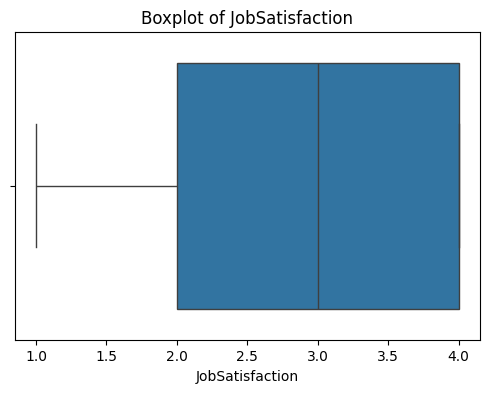

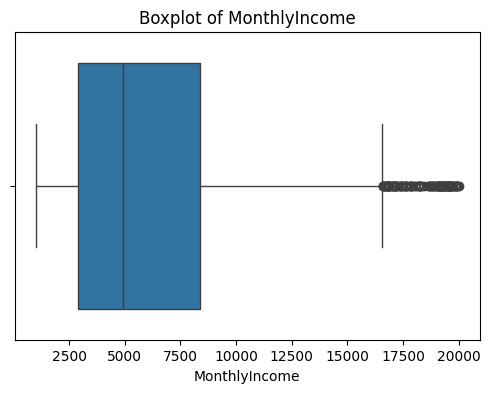

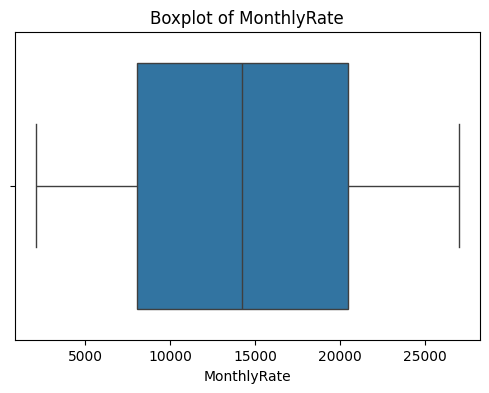

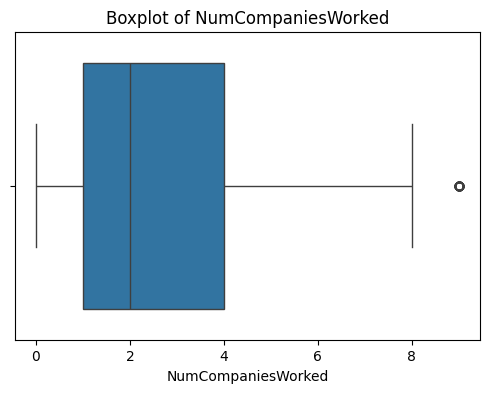

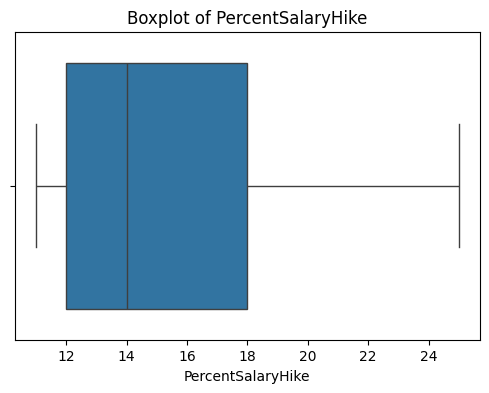

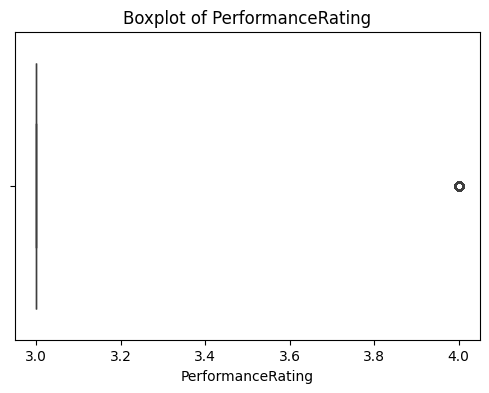

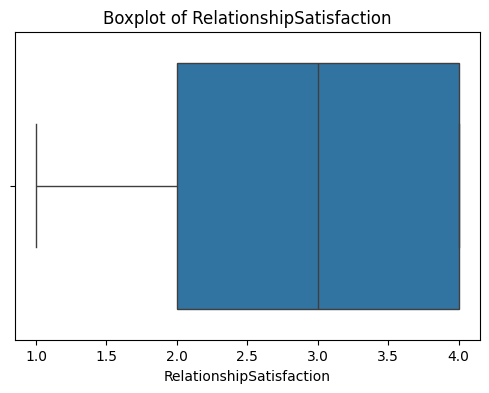

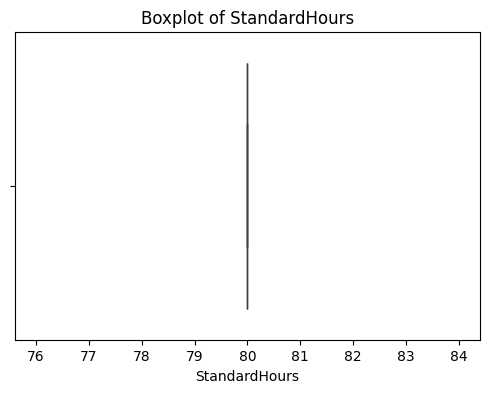

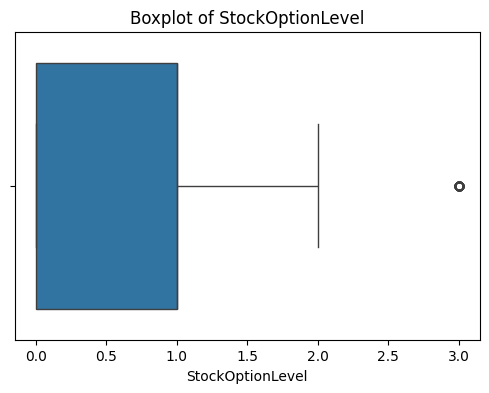

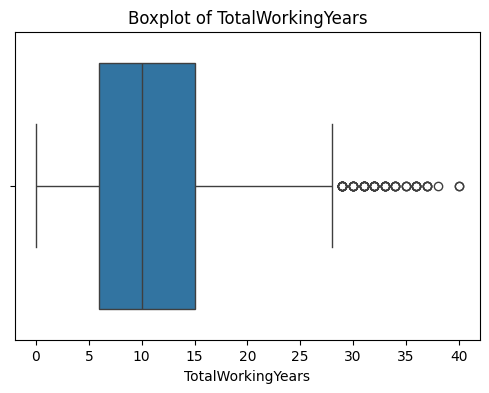

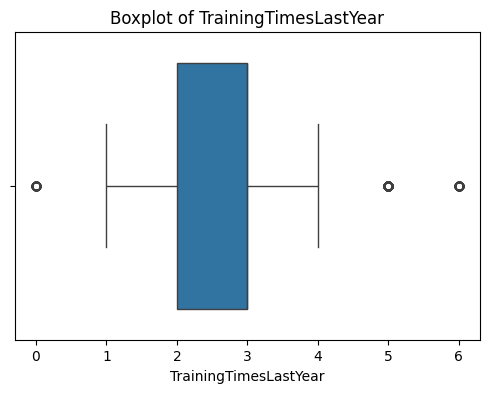

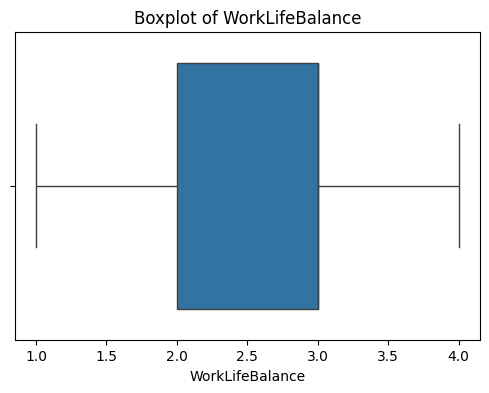

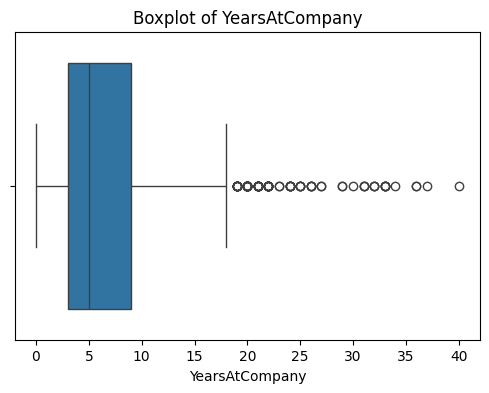

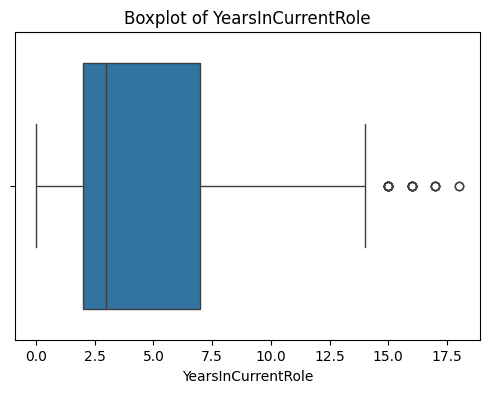

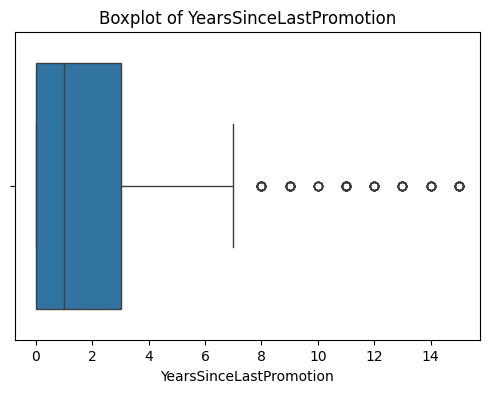

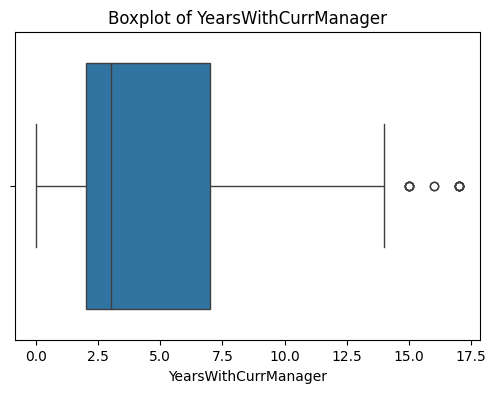

In [ ]:
num_cols = df.select_dtypes(include=["int64"]).columns
# Boxplots to Identify Outliers
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

The boxplots reveal outliers in the numerical columns, further necessitating the need for scaling. The categorical variables have clear differences in sizes of the groups, perhaps highlighting the ability to segment employees based on these variables.

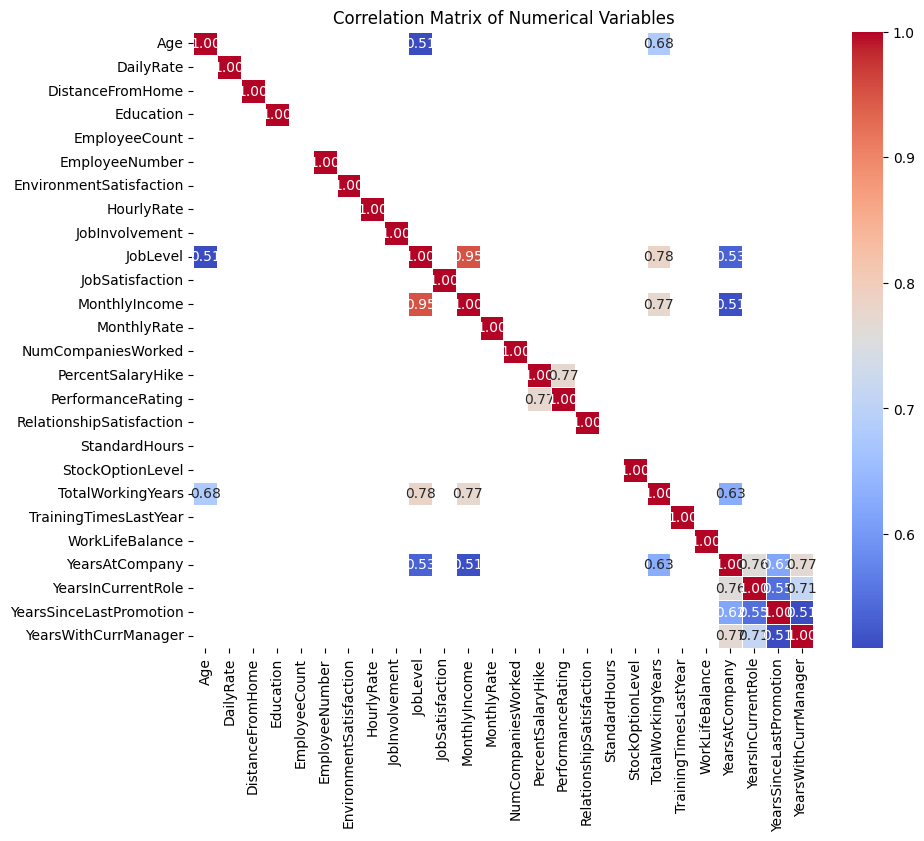

In [ ]:
# Correlation Matrix
corr_matrix = df[num_cols].corr()
mask = np.abs(corr_matrix) < 0.5
corr_matrix[mask] = np.nan

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [ ]:
# Get absolute correlations and filter those above 0.5 (excluding self-correlations)
high_corr = corr_matrix.abs().unstack().reset_index()
high_corr.columns = ["Variable 1", "Variable 2", "Correlation"]
high_corr = high_corr[high_corr["Variable 1"] != high_corr["Variable 2"]]  # Remove self-correlations
high_corr = high_corr[high_corr["Correlation"] > 0.5].sort_values(by="Correlation", ascending=False)

# Drop duplicate pairs (e.g., A-B and B-A)
high_corr = high_corr.iloc[::2].reset_index(drop=True)

print(high_corr)

                 Variable 1               Variable 2  Correlation
0                  JobLevel            MonthlyIncome     0.950300
1         TotalWorkingYears                 JobLevel     0.782208
2         PerformanceRating        PercentSalaryHike     0.773550
3             MonthlyIncome        TotalWorkingYears     0.772893
4      YearsWithCurrManager           YearsAtCompany     0.769212
5        YearsInCurrentRole           YearsAtCompany     0.758754
6        YearsInCurrentRole     YearsWithCurrManager     0.714365
7         TotalWorkingYears                      Age     0.680381
8         TotalWorkingYears           YearsAtCompany     0.628133
9   YearsSinceLastPromotion           YearsAtCompany     0.618409
10       YearsInCurrentRole  YearsSinceLastPromotion     0.548056
11                 JobLevel           YearsAtCompany     0.534739
12           YearsAtCompany            MonthlyIncome     0.514285
13     YearsWithCurrManager  YearsSinceLastPromotion     0.510224
14        

There are high correlations between the above pairings. We will have to remove Job Level, Years At Company, and Years with Current Manager to avoid multicollinearity.

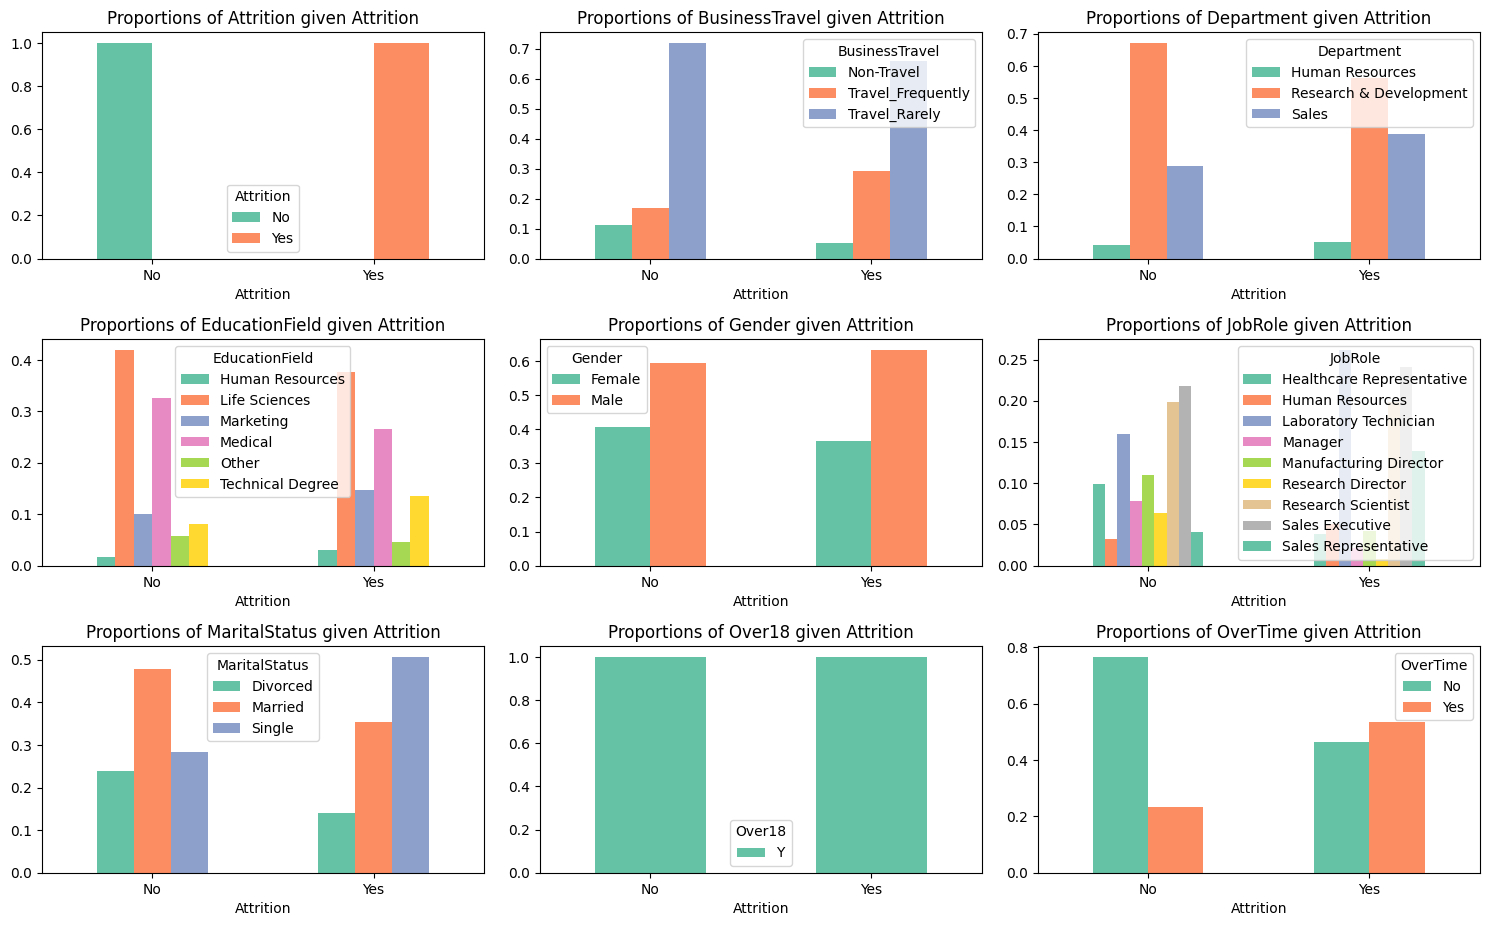

In [ ]:
# Plot categories given attrition
plt.figure(figsize=(15, 12))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 3 + 1, 3, i)

    prop_table = pd.crosstab(df[column], df['Attrition'], normalize='columns').T

    prop_table.plot(kind='bar', stacked=False, ax=plt.gca(), color=sns.color_palette('Set2', len(prop_table.columns)))

    plt.title(f'Proportions of {column} given Attrition')

    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


<ipython-input-43-d8bae5d276ec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='coolwarm', ax=axes[0])
<ipython-input-43-d8bae5d276ec>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-43-d8bae5d276ec>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-43-d8bae5d276ec>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-43-d8bae5d276ec>:16: UserWarning: 

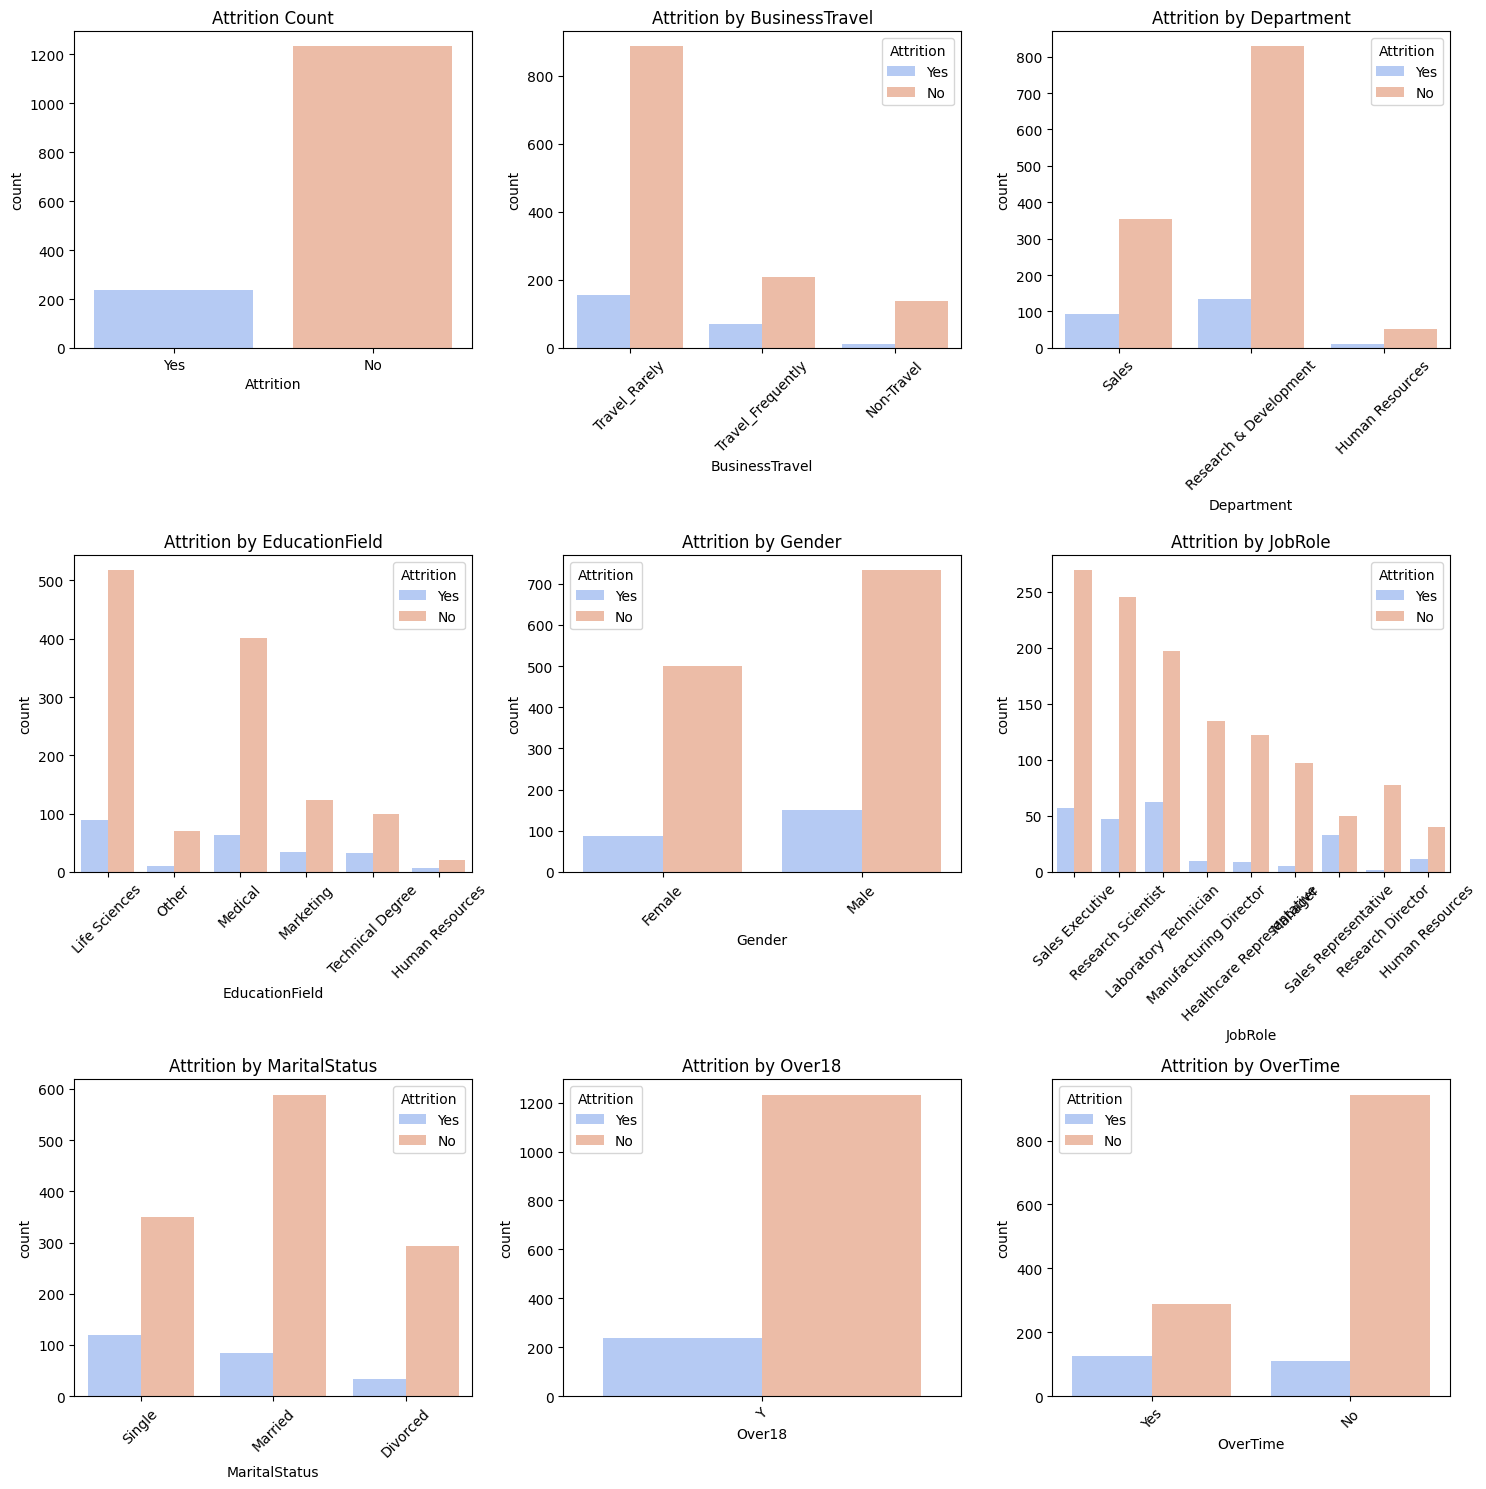

In [ ]:
# Plot attrition given categories
num_plots = len(cat_cols) + 1
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

axes = axes.flatten()

sns.countplot(x='Attrition', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title("Attrition Count")

for i, col in enumerate(cat_cols):
    ax = axes[i + 1]
    sns.countplot(x=df[col], hue=df["Attrition"], palette="coolwarm", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Attrition by {col}')

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

For employees that attrited, there is different proportions of each group for each categorical variable. The proportions are also different compared to the employees that stayed. This provides support for us needing to cluster based on categorical variables.

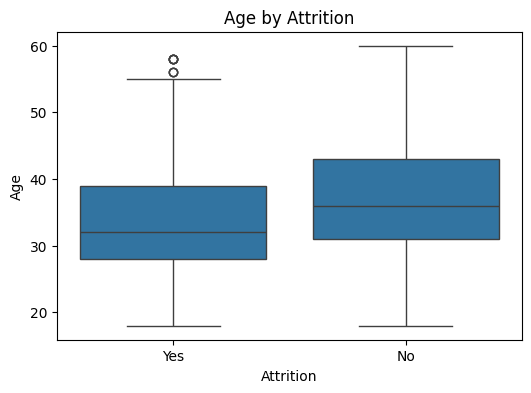

Age - T-test p-value: nan


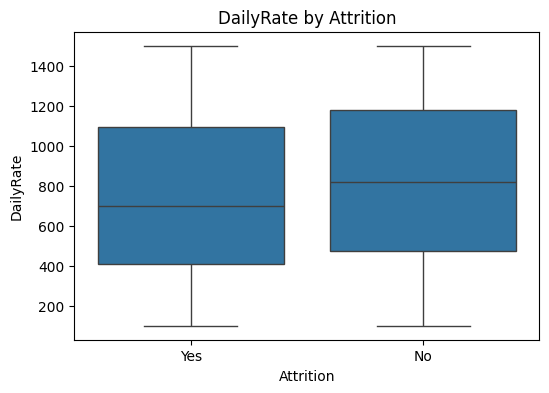

DailyRate - T-test p-value: nan


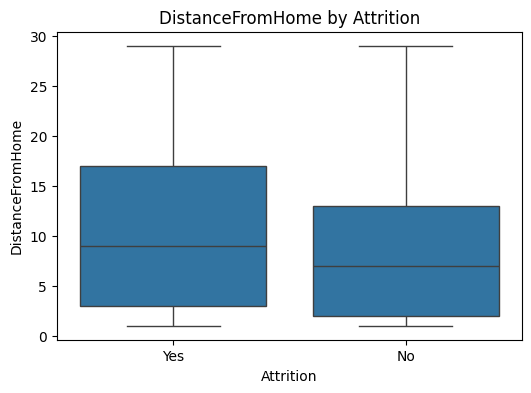

DistanceFromHome - T-test p-value: nan


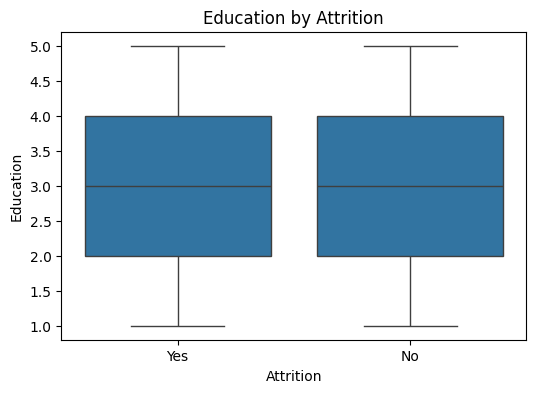

Education - T-test p-value: nan


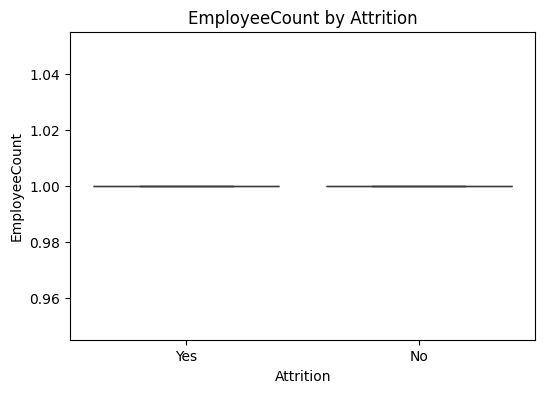

EmployeeCount - T-test p-value: nan


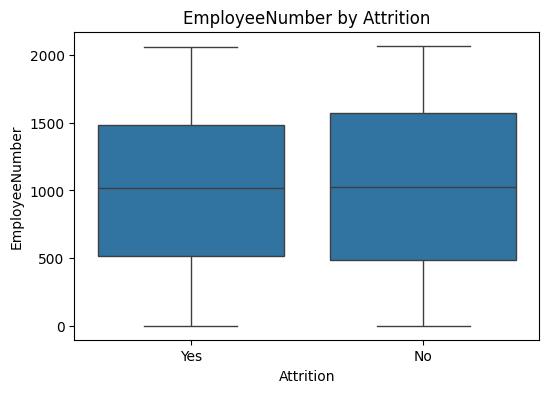

EmployeeNumber - T-test p-value: nan


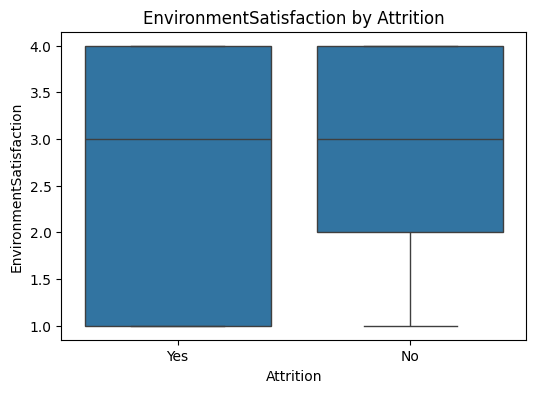

EnvironmentSatisfaction - T-test p-value: nan


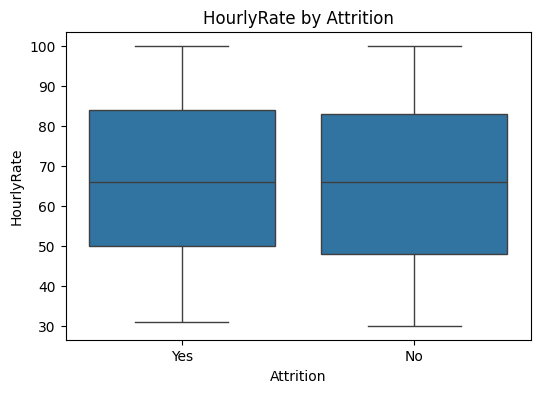

HourlyRate - T-test p-value: nan


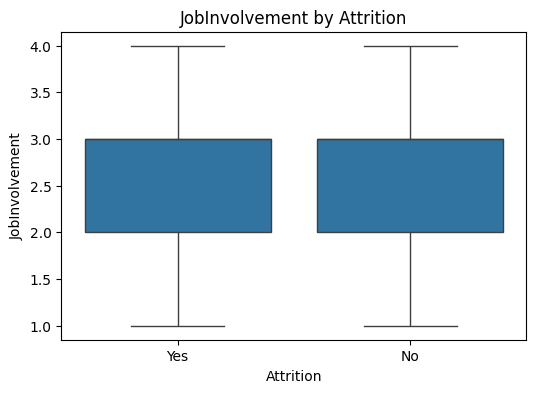

JobInvolvement - T-test p-value: nan


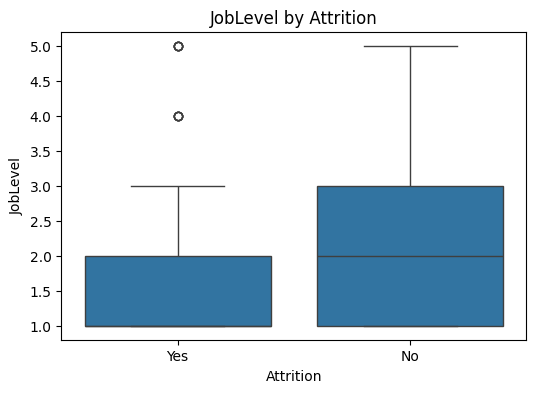

JobLevel - T-test p-value: nan


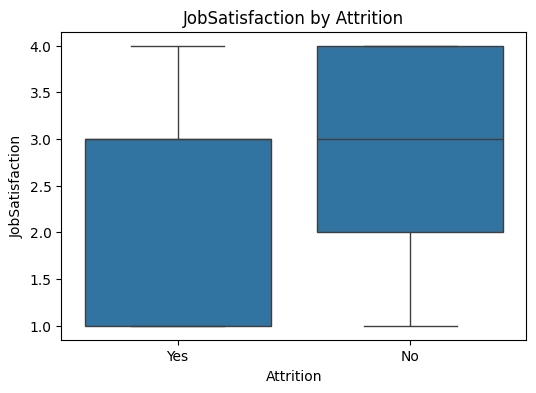

JobSatisfaction - T-test p-value: nan


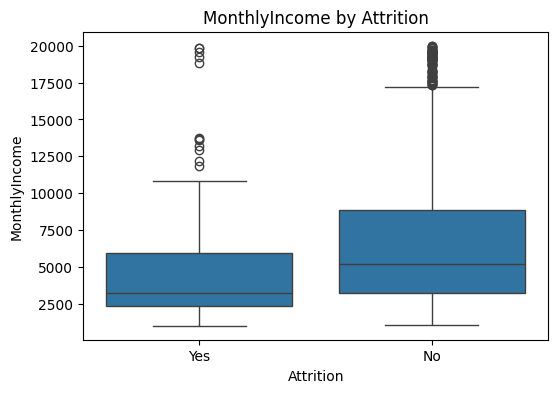

MonthlyIncome - T-test p-value: nan


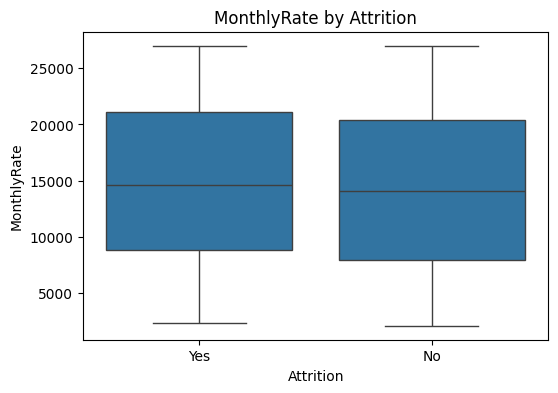

MonthlyRate - T-test p-value: nan


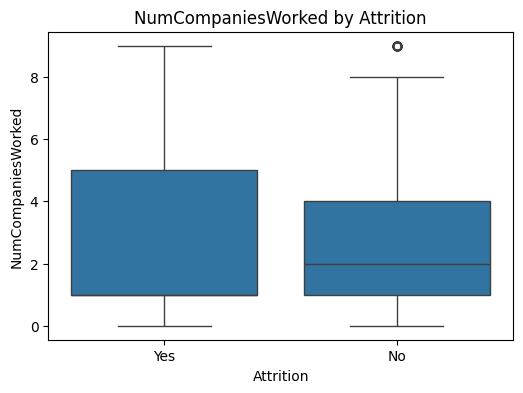

NumCompaniesWorked - T-test p-value: nan


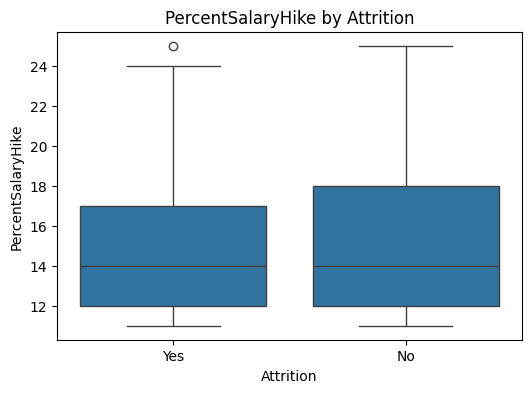

PercentSalaryHike - T-test p-value: nan


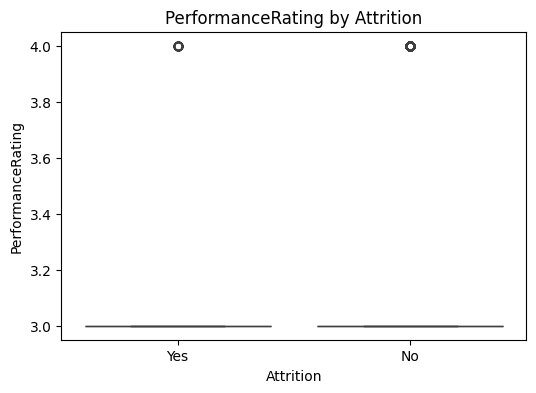

PerformanceRating - T-test p-value: nan


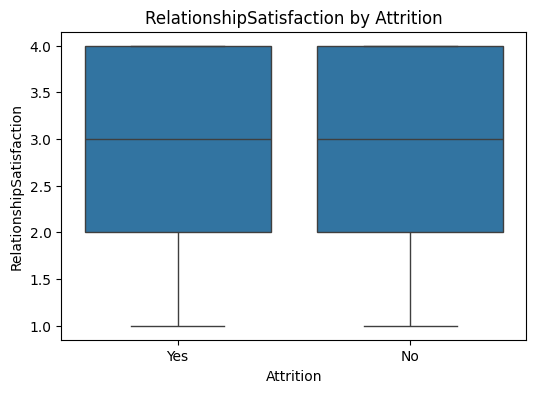

RelationshipSatisfaction - T-test p-value: nan


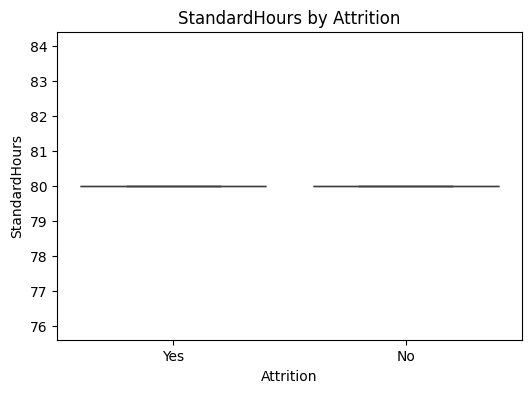

StandardHours - T-test p-value: nan


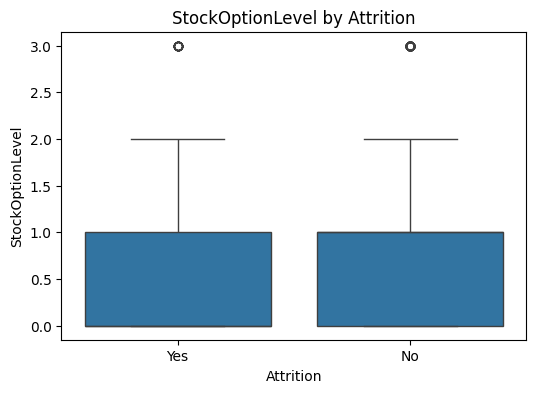

StockOptionLevel - T-test p-value: nan


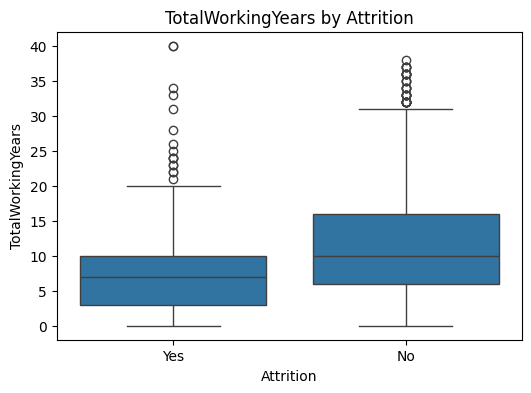

TotalWorkingYears - T-test p-value: nan


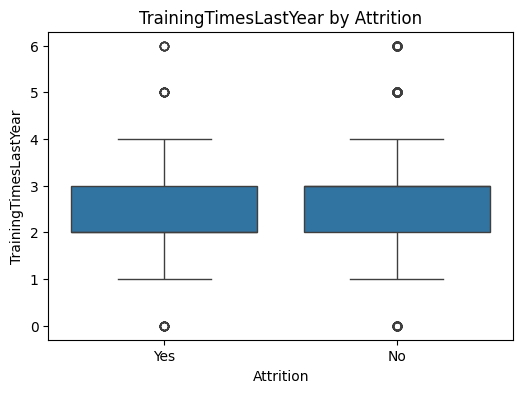

TrainingTimesLastYear - T-test p-value: nan


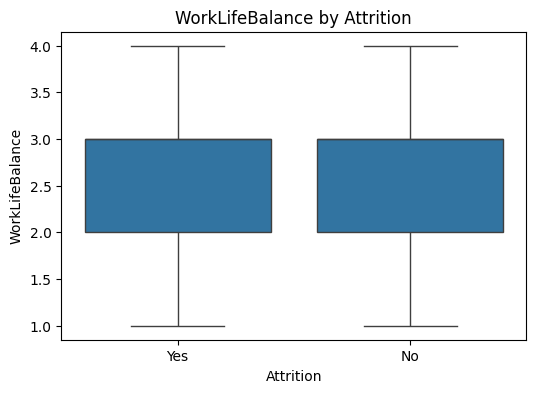

WorkLifeBalance - T-test p-value: nan


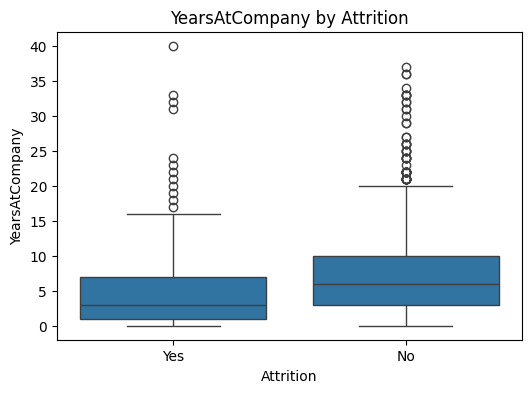

YearsAtCompany - T-test p-value: nan


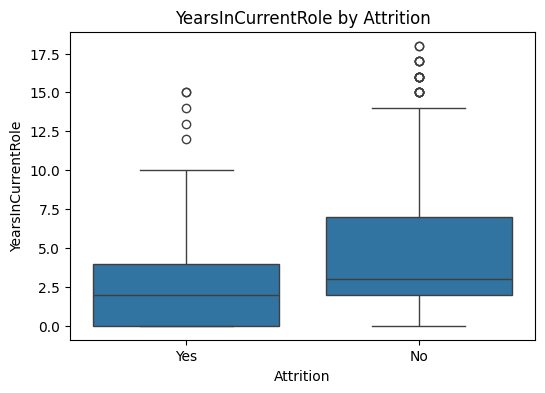

YearsInCurrentRole - T-test p-value: nan


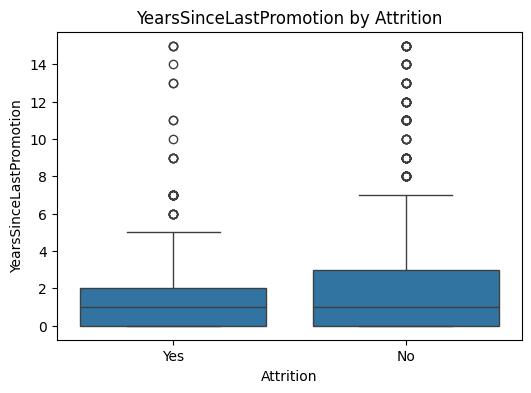

YearsSinceLastPromotion - T-test p-value: nan


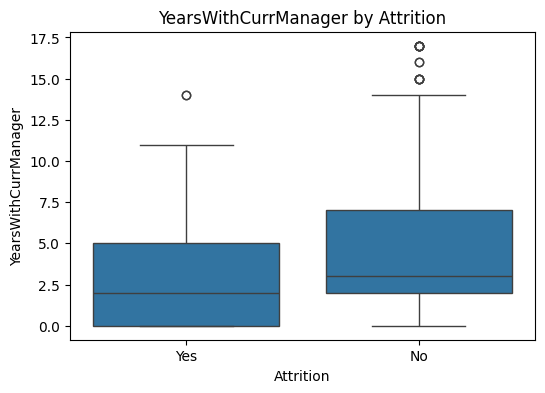

YearsWithCurrManager - T-test p-value: nan


In [ ]:
# Compare boxplots for each category given attrition
for var in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Attrition", y=var, data=df)
    plt.title(f"{var} by Attrition")
    plt.show()

    # Statistical test --> is there a significant difference in the means?
    group_yes = df[df["Attrition"] == 1][var]
    group_no = df[df["Attrition"] == 0][var]
    stat, p = ttest_ind(group_yes, group_no, equal_var=False)  # Welch’s t-test
    print(f"{var} - T-test p-value: {p:.4f}")

The employees that did not leave tend to have higher median monthly incomes, median job satisfaction, and median years at the company, and longer median years with current manager. This indicates there are clear differences between employees who attrited and those who didn't. These could be potential features for developing our models.

## Final Presentation Graphs

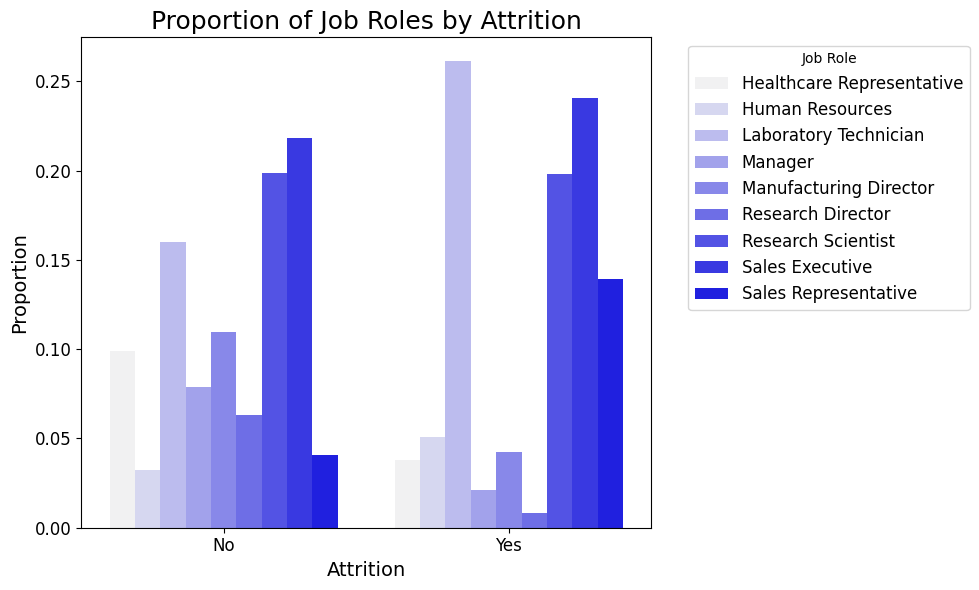

In [ ]:
# Group by Attrition and JobRole, then get proportions
jobrole_attrition_counts = df.groupby(['Attrition', 'JobRole']).size().reset_index(name='Count')
jobrole_attrition_counts['Proportion'] = jobrole_attrition_counts.groupby('Attrition')['Count'].transform(lambda x: x / x.sum())


plt.figure(figsize=(10, 6))
blue_palette = sns.light_palette("blue", n_colors=len(jobrole_attrition_counts['JobRole'].unique()))

sns.barplot(data=jobrole_attrition_counts, x='Attrition', y='Proportion', hue='JobRole',  palette=blue_palette)
plt.title('Proportion of Job Roles by Attrition', fontsize = 18)
plt.xlabel('Attrition', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

<ipython-input-4-4b2efc3e1ca5>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.barplot(data=jobrole_attrition_counts, x='Attrition', y='Proportion', hue='MaritalStatus',  palette=blue_palette)


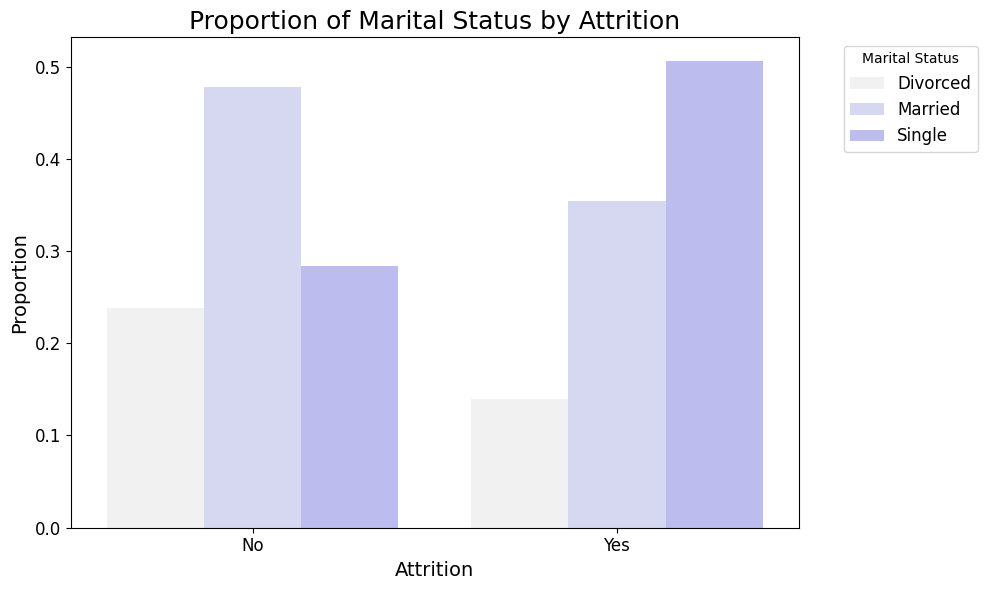

In [ ]:
# Group by Attrition and JobRole, then get proportions
jobrole_attrition_counts = df.groupby(['Attrition', 'MaritalStatus']).size().reset_index(name='Count')
jobrole_attrition_counts['Proportion'] = jobrole_attrition_counts.groupby('Attrition')['Count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(10, 6))


sns.barplot(data=jobrole_attrition_counts, x='Attrition', y='Proportion', hue='MaritalStatus',  palette=blue_palette)
plt.title('Proportion of Marital Status by Attrition', fontsize = 18)
plt.xlabel('Attrition', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()


plt.show()

<ipython-input-8-2f422bb9181f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette=dark_blue_palette)


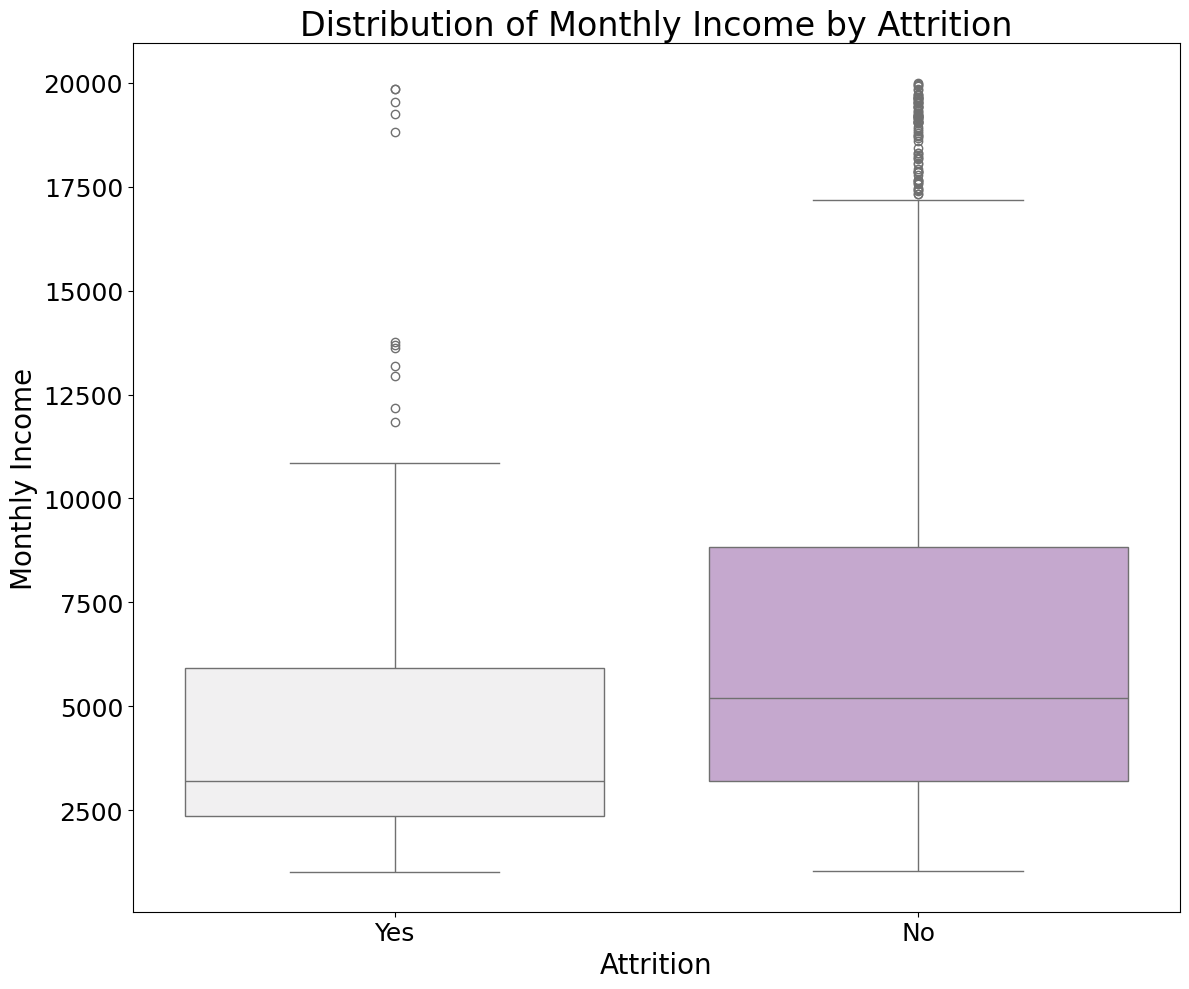

In [8]:
# Boxplot of monthly income by attrition
plt.figure(figsize=(12, 10))
dark_blue_palette = sns.light_palette("#C8A2D4", n_colors=2)
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette=dark_blue_palette)

plt.title('Distribution of Monthly Income by Attrition', fontsize=24)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('Monthly Income', fontsize=20)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()


plt.show()

<ipython-input-7-0f076a6164c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears',


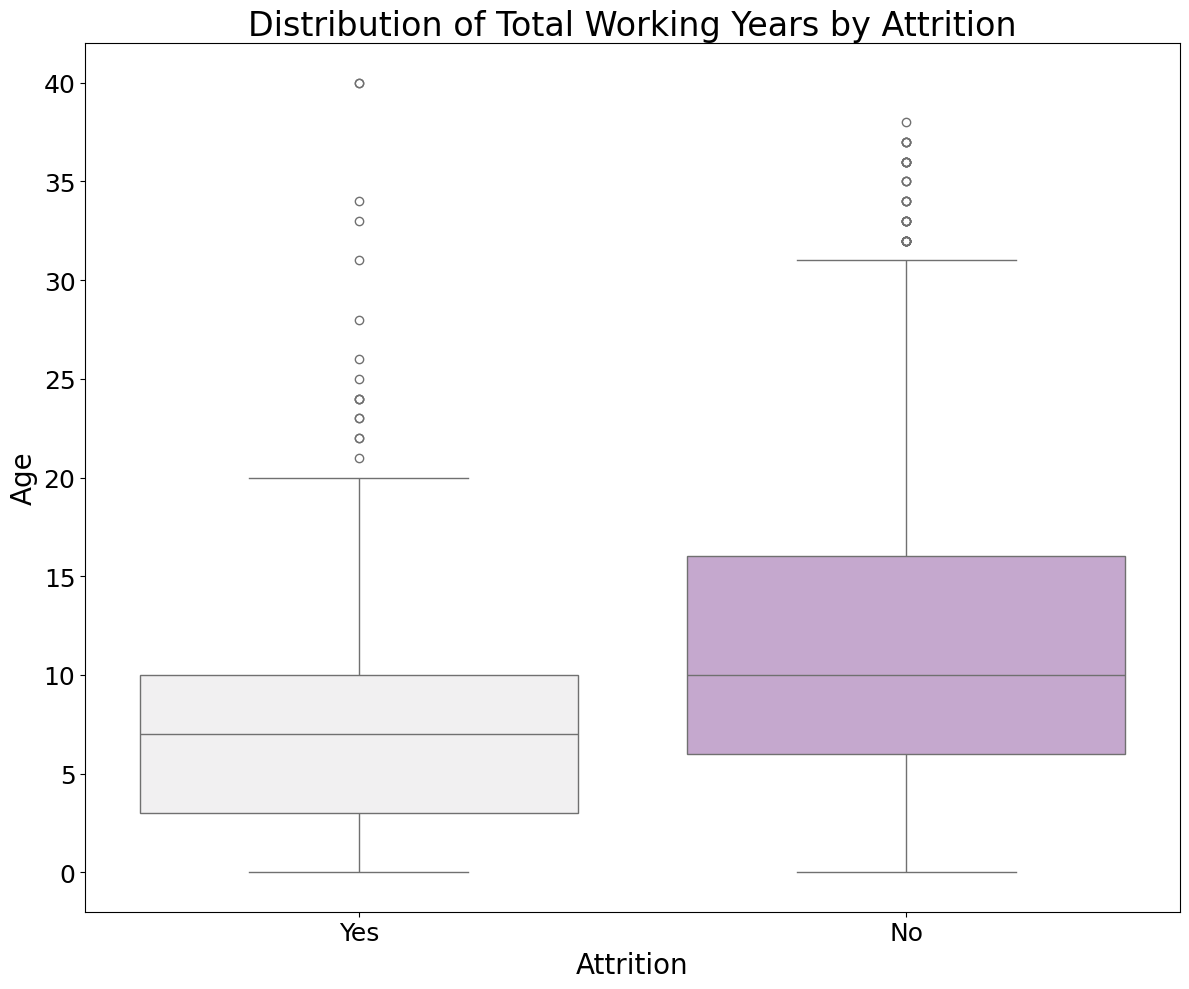

In [7]:
# Boxplot of age by attrition
plt.figure(figsize=(12, 10))
dark_blue_palette = sns.light_palette("#C8A2D4", n_colors=2)
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears',
            palette=dark_blue_palette)

plt.title('Distribution of Total Working Years by Attrition', fontsize=24)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('Age', fontsize=20)

plt.xticks(fontsize=18)

plt.yticks(fontsize=18)

plt.tight_layout()

plt.show()

In [ ]:
df[df['Attrition'] == 'Yes']['JobSatisfaction'].describe()

,JobSatisfaction
count,237.000000
mean,2.468354
std,1.118058
min,1.000000
25%,1.000000
50%,3.000000
75%,3.000000
max,4.000000


## Data Cleaning

In [ ]:
df_cleaned = df.drop(columns=["JobLevel", "YearsAtCompany", "YearsWithCurrManager","EmployeeCount","StandardHours","Over18", "EmployeeNumber"], errors='ignore')

In [ ]:
# Manually define ordinal categorical columns
ordinal_cols = {
    "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
    "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "PerformanceRating": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
    "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "WorkLifeBalance": {1: "Bad", 2: "Good", 3: "Better", 4: "Best"}
}

# Replace ordinal column integer values with corresponding category labels
for col, mapping in ordinal_cols.items():
    df_cleaned[col] = df_cleaned[col].replace(mapping)

# Convert ordinal columns to categorical dtype for proper identification
for col in ordinal_cols.keys():
    df_cleaned[col] = df_cleaned[col].astype("category")

In [ ]:
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Yes,11,Excellent,Low,0,8,0,Bad,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,No,23,Outstanding,Very High,1,10,3,Better,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Yes,15,Excellent,Medium,0,7,3,Better,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Yes,11,Excellent,High,0,8,3,Better,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,No,12,Excellent,Very High,1,6,3,Better,2,2


In [ ]:
# Check final schema
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   object  
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   category
 12  JobRole                   1470 non-null   object  
 13  JobSatisfaction           1470 non-null   catego

Summary of data cleaning:

* Droped the following columns: JobLevel, YearsAtCompany, YearswithCurrManager, EmployeeCount, StandardHours, Over18, EmployeeNumber. JobLevel, YearsAtCompany and YearswithCurrManager are highly correlated with other variables. EmployeeCount, StandardHours and Over18 have only one unique value and no variability in data. EmployeeNumber is a unique id for each employee.
* Manually defined ordinal columns:

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

## Split Train and Test

In [ ]:
X = df_cleaned.drop(columns=['Attrition'])
y = df_cleaned['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [ ]:
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

* Splitting into 80:20 train:test
* Saving train and test data for future use